In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import cvxpy

import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt 
from sympy import *

from jupyterthemes import jtplot
%matplotlib inline
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
# vector b
b = np.array([[0],[0],[10]])

# matrix A
A = np.array([[0,-1,1],[-1,0,1],[1,1,0]])


# find vector Ax (projection of vector b)
x = np.linalg.solve(A.T@A,A.T@b)
Ax = A@x

print(f'Vector b {b.T}')
print(f'Projection: {Ax.T}')
# Magnitude of vector projected vector Ax
print(f'Magnitide of projected vector: {np.linalg.norm(Ax)}')
print(x)

Vector b [[ 0  0 10]]
Projection: [[8.8817842e-16 8.8817842e-16 1.0000000e+01]]
Magnitide of projected vector: 10.0
[[5.]
 [5.]
 [5.]]


In [4]:
import sympy as sp

Задание 2.3 Прямоугольный параллелепипед имеет объем 1 м

Какова минимальная площадь его поверхности?

In [5]:
a, b, c, λ = sp.symbols('a, b, c, λ')

f1 = 2*b + 2*c + λ*b*c
f2 = 2*a + 2*c + λ*a*c
f3 = 2*a + 2*b + λ*a*b
f4 = a*b*c - 1

sp.solvers.solve((f1, f2, f3, f4), (a, b, c, λ))

C:\Users\wangshu202040\Anaconda3\lib\site-packages\sympy\__init__.py:672: SymPyDeprecationWarning: 

importing sympy.solvers.solvers with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.solvers.solvers instead.
See https://github.com/sympy/sympy/issues/18245 for more info.

  self.Warn(


[(1, 1, 1, -4),
 (-1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 2 - 2*sqrt(3)*I),
 (-1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 2 + 2*sqrt(3)*I)]

In [8]:
x1,x2,l1,l2,x1t = sp.symbols('x1,x2,l1,l2,x1t')
f1 = -x2+l1-l2
f2 = -x1+l1
f3 = 2*l2*x1t
f4 = x1+x2-10
f5 = -x1+6+(x1t**2)
sp.solvers.solve((f1,f2,f3,f4,f5),(x1,x2,l1,l2,x1t))

C:\Users\wangshu202040\Anaconda3\lib\site-packages\sympy\__init__.py:672: SymPyDeprecationWarning: 

importing sympy.solvers.solvers with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.solvers.solvers instead.
See https://github.com/sympy/sympy/issues/18245 for more info.

  self.Warn(


[(5, 5, 5, 0, -I), (5, 5, 5, 0, I), (6, 4, 6, 2, 0)]

Допустим, у нас есть $n$ товаров с заданными стоимостями $v_i$ и массой $w_i$. В сумку убирается $С$ кг. Сколько какого товара взять, чтобы сумма всех стоимостей товаров была наибольшей?

In [11]:
values = [4, 2, 1, 7, 3, 6]
weights = [5, 9, 8, 2, 6, 5]
C = 15
n = 6

Сформулируем задачу:
$$\max\sum v_i x_i$$
$$\sum w_i x_i \leq C $$

Как должна выглядеть задача:
$$\min c^T x$$
$$A x \leq b $$

Получается, что $c=-v$, $A=w^T$, $b=(C)$

In [17]:
c = - np.array(values)     # cost of products
A = np.array((weights))         #shape = (6,)
A = np.expand_dims(A, 0)      #shape = (1,6)
b = np.array([C])

In [2]:
from scipy.optimize import linprog

In [20]:
linprog(c=c, A_ub=A, b_ub=b)

     con: array([], dtype=float64)
     fun: -52.50000000003077
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-2.2495783e-11])
  status: 0
 success: True
       x: array([6.18738532e-14, 1.05853306e-12, 1.21475943e-13, 7.50000000e+00,
       4.00246692e-13, 4.71394162e-13])

In [3]:
c = np.array([2, 5, 3, 7, 7, 6])
x = cvxpy.Variable(shape=6, integer=True)
A = np.array([[1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1]])
b = np.array([180, 220])

constraint = [(A@x <= b),
              x[0]+x[3] == 110,
              x[1]+x[4] == 150,
              x[2]+x[5] == 140,
              x >= 0]

total_value = c@x
problem = cvxpy.Problem(cvxpy.Minimize(total_value),constraints=constraint)
problem.solve(solver='ECOS_BB')


1900.0000000102355

Решите задачу о назначениях

<img src="https://lms.skillfactory.ru/assets/courseware/v1/304a4fb2612ca0e3c68b1f681bd1876c/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/MAT_4_unit_61.png" width="600px">

In [26]:
c = np.array([[1000, 12, 10, 19, 8], [12, 1000, 3, 7, 2],
              [10, 3, 1000, 6, 20], [19, 7, 6, 1000, 4],
              [8, 2, 20, 4, 1000]])
x = cvxpy.Variable(shape=(5, 5), boolean=True)

constraint = [cvxpy.sum(x, axis=0) == np.ones(5),
              cvxpy.sum(x, axis=1) == np.ones(5)]

func = cvxpy.sum(cvxpy.multiply(x,c))

problem = cvxpy.Problem(cvxpy.Minimize(func),constraints=constraint)
problem.solve(solver='ECOS_BB')

31.999999999961364

In [29]:
np.round(x.value)

array([[ 0.,  0., -0., -0.,  1.],
       [ 0., -0.,  0.,  1.,  0.],
       [-0.,  1.,  0., -0., -0.],
       [-0.,  0.,  1.,  0., -0.],
       [ 1.,  0., -0., -0.,  0.]])

In [25]:
x.value

# GRADIENT DESCENT

In [2]:
def f(x, y):
    return (1-x)**2 + 100*(y-x**2)**2


# def grad(x, y):
#     dx = 2*x-2+100*(-4*y*x+4*x**3)
#     dy = 100*(2*y-2*x**2)
#     return (dx,dy)

def grad(x, y):
    dx = 400*x**3+(2-400*y)*x-2
    dy = 100*(2*y-2*x**2)
    return (dx,dy)

In [3]:
x0 = (0, 0)  # starting point
gamma = 1e-6  # learning rate
x_cur = x0  # current x (origin is x0)

vals = []  # val of func in each ittertation
coords = []  # coord of x in each iter
i = 0
while True:
    x_new = (x_cur[0] - gamma*grad(*x_cur)[0], 
             x_cur[1] - gamma*grad(*x_cur)[1])
    if i > 50000000:
        break
    x_cur=x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    if i%1000000 == 0:
        print(f'Iter = {i}; x = ({x_cur[0]:.2f},{x_cur[1]:.2f});'   # 2f -means two signs after coma
             f'f(x)= {f(*x_cur):.2f}: grad f(x) = {grad(*x_cur)[0]:.2f},{grad(*x_cur)[1]:.2f} ')

Iter = 1000000; x = (0.67,0.45);f(x)= 0.11: grad f(x) = -0.23,-0.31 
Iter = 2000000; x = (0.82,0.68);f(x)= 0.03: grad f(x) = -0.10,-0.16 
Iter = 3000000; x = (0.89,0.80);f(x)= 0.01: grad f(x) = -0.05,-0.09 
Iter = 4000000; x = (0.93,0.87);f(x)= 0.00: grad f(x) = -0.03,-0.06 
Iter = 5000000; x = (0.96,0.91);f(x)= 0.00: grad f(x) = -0.02,-0.04 
Iter = 6000000; x = (0.97,0.94);f(x)= 0.00: grad f(x) = -0.01,-0.02 
Iter = 7000000; x = (0.98,0.96);f(x)= 0.00: grad f(x) = -0.01,-0.02 
Iter = 8000000; x = (0.99,0.97);f(x)= 0.00: grad f(x) = -0.01,-0.01 
Iter = 9000000; x = (0.99,0.98);f(x)= 0.00: grad f(x) = -0.00,-0.01 
Iter = 10000000; x = (0.99,0.99);f(x)= 0.00: grad f(x) = -0.00,-0.00 
Iter = 11000000; x = (1.00,0.99);f(x)= 0.00: grad f(x) = -0.00,-0.00 


KeyboardInterrupt: 

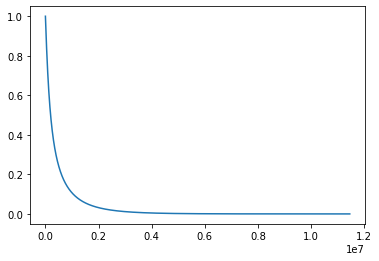

In [4]:
plt.plot(vals)

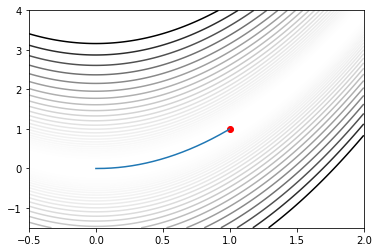

In [5]:
n = 100  # number of discretiaztion points along the axis x
m = 100  # number of discretiaztion points along the axis y
# extream points in the x-axis
a = -.5
b = 2
# extream points in the y-axis
c = -1.5
d = 4
X,Y = np.meshgrid(np.linspace(a,b,n),np.linspace(c,d,m))

Z = f(X,Y)

plt.xlim(a,b)
plt.ylim(c,d)

plt.contour(X,Y,Z, np.logspace(0.5,3,31),cmap = 'gray_r')
plt.plot([c[0] for c in coords],[c[1]for c in coords])
plt.scatter(1,1,c='red')

In [10]:
x0 = (0, 2)  # starting point
gamma = 1e-3  # learning rate
x_cur = x0  # current x (origin is x0)

vals = []  # val of func in each ittertation
coords = []  # coord of x in each iter
i = 0
while True:
    x_new = (x_cur[0] - gamma*grad(*x_cur)[0], 
             x_cur[1] - gamma*grad(*x_cur)[1])
    if f(*x_cur)< 0.01:
        break
    x_cur=x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f'Iter = {i}; x = ({x_cur[0]:.2f},{x_cur[1]:.2f});'   # 2f -means two signs after coma
          f'f(x)= {f(*x_cur):.2f}: grad f(x) = {grad(*x_cur)[0]:.2f},{grad(*x_cur)[1]:.2f} ')

Iter = 1; x = (0.00,1.60);f(x)= 256.99: grad f(x) = -3.28,320.00 
Iter = 2; x = (0.01,1.28);f(x)= 164.82: grad f(x) = -4.69,255.99 
Iter = 3; x = (0.01,1.02);f(x)= 105.82: grad f(x) = -6.06,204.78 
Iter = 4; x = (0.02,0.82);f(x)= 68.04: grad f(x) = -7.22,163.79 
Iter = 5; x = (0.02,0.66);f(x)= 43.84: grad f(x) = -8.04,130.98 
Iter = 6; x = (0.03,0.52);f(x)= 28.34: grad f(x) = -8.49,104.69 
Iter = 7; x = (0.04,0.42);f(x)= 18.41: grad f(x) = -8.57,83.64 
Iter = 8; x = (0.05,0.34);f(x)= 12.05: grad f(x) = -8.36,66.76 
Iter = 9; x = (0.06,0.27);f(x)= 7.97: grad f(x) = -7.92,53.23 
Iter = 10; x = (0.06,0.22);f(x)= 5.37: grad f(x) = -7.35,42.39 
Iter = 11; x = (0.07,0.17);f(x)= 3.70: grad f(x) = -6.71,33.71 
Iter = 12; x = (0.08,0.14);f(x)= 2.64: grad f(x) = -6.06,26.77 
Iter = 13; x = (0.08,0.11);f(x)= 1.96: grad f(x) = -5.43,21.22 
Iter = 14; x = (0.09,0.09);f(x)= 1.53: grad f(x) = -4.85,16.78 
Iter = 15; x = (0.10,0.08);f(x)= 1.26: grad f(x) = -4.33,13.25 
Iter = 16; x = (0.10,0.06);f(x)=

Iter = 2669; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2670; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2671; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2672; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2673; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2674; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2675; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2676; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2677; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2678; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2679; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2680; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2681; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2682; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 2683; x = (0.88,0.77);f(x)= 0.02: grad f(x) = -0.06,-0.11 
Iter = 268

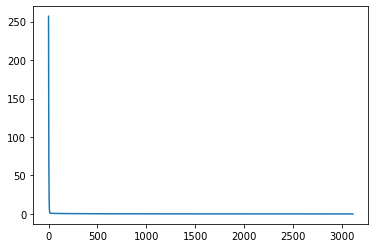

In [11]:
plt.plot(vals)

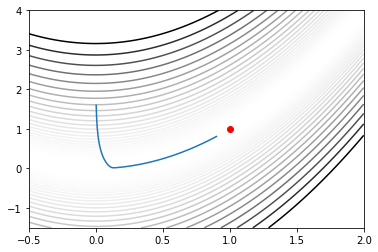

In [12]:
n = 100  # number of discretiaztion points along the axis x
m = 100  # number of discretiaztion points along the axis y
# extream points in the x-axis
a = -.5
b = 2
# extream points in the y-axis
c = -1.5
d = 4
X,Y = np.meshgrid(np.linspace(a,b,n),np.linspace(c,d,m))

Z = f(X,Y)

plt.xlim(a,b)
plt.ylim(c,d)

plt.contour(X,Y,Z, np.logspace(0.5,3,31),cmap = 'gray_r')
plt.plot([c[0] for c in coords],[c[1]for c in coords])
plt.scatter(1,1,c='red')

In [2]:
from scipy import optimize

In [14]:
def f_for_scipy(x):
    return f(x[0],x[1])

In [15]:
optimize.minimize(f_for_scipy,x0=(0,0))

      fun: 2.83877262386752e-11
 hess_inv: array([[0.49483257, 0.98959173],
       [0.98959173, 1.98397181]])
      jac: array([ 4.00800841e-06, -2.84985260e-06])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999468, 0.99998933])

Задание 7.1
Найдите градиентным спуском минимум функции 
$2x^2$ - $4xy$ + $y^4$ +$2$


In [37]:
def f(x, y):
    return (2*x**2) - (4*x*y) + (y**4) + 2

In [38]:
def f_s(x):
    return f(x[0],x[1])

In [41]:
optimize.minimize(f_s,x0=(0,5))

      fun: 1.0000000000003495
 hess_inv: array([[0.37435842, 0.1274451 ],
       [0.1274451 , 0.11441576]])
      jac: array([ 1.07288361e-06, -2.81631947e-06])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 14
     njev: 15
   status: 0
  success: True
        x: array([1.00000004, 0.99999977])

Задание 7.1
Найдите градиентным спуском минимум функции 
$x^3$ - $2x^2$ + $y^2$ +$z^2$ - $2xy$ +$xz$ - $yz$ +$3z$


In [42]:
def f(x, y, z):
    return x**3 - 2*x**2 + y**2 + z**2 - 2*x*y + x*z - y*z + 3*z

In [43]:
def f_s(x):
    return f(x[0],x[1],x[2])

In [51]:
optimize.minimize(f_s,x0=(6,20,5))

      fun: -6.999999999999801
 hess_inv: array([[0.16036915, 0.16442134, 0.00348534],
       [0.16442134, 0.83457488, 0.33180721],
       [0.00348534, 0.33180721, 0.66942124]])
      jac: array([-1.60932541e-06,  1.19209290e-07,  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([ 1.99999975,  0.99999986, -1.99999991])

Задание 3.7.3
В модели линейной регрессии три наблюдения:

$x1 = 1; x2 = 3; x3 = 5$

$y1 = 2.1; y2 = 2.9; y3 = 4.1$

$y = w0 + w1x$

Loss function

L = $(2.1-w0-w1)^2$ + $(2.9 - w0 - 3w1)^2$ + $(4.1 - w0 - 5w1)^2$

In [3]:
def f(w0, w1):
    return (2.1 - w0 - w1)**2 + (2.9 - w0 - 3*w1)**2 + (4.1 - w0 - 5*w1)**2

In [4]:
optimize.minimize(lambda x: f(*x), x0 = (0,0))

      fun: 0.02666666666666872
 hess_inv: array([[ 0.73702147, -0.18951703],
       [-0.18951703,  0.06301795]])
      jac: array([-6.70552254e-08, -9.31322575e-10])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.53333335, 0.49999999])

In [13]:
f(1.53333335,0.49999999)

0.026666666666667997

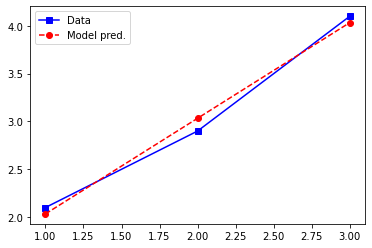

yHat :
 [[2.03333333]
 [3.03333333]
 [4.03333333]]
Weights :
 [[1.53333333]
 [0.5       ]]


In [36]:
# y = X*b
y = np.array([[2.1,2.9,4.1]]).T
N = len(y)
# design matrix
X = np.concatenate( [np.ones([N,1]),np.array([[1,3,5]]).T],axis=1)
# Columns of ones is called as intercept
# fit the model
b = np.linalg.solve(X.T@X,X.T@y)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()
print(f'yHat :\n {yHat}')
print(f'Weights :\n {b}')

In [3]:
(2.1 - 1.53333333 - 0.5)**2 + (2.9 - 1.53333333 - 3*0.5)**2 + (4.1 - 1.53333333 - 5*0.5)**2

0.02666666666666669

# Newton Method

<img src="https://lms.skillfactory.ru/assets/courseware/v1/e908f9721cc82415fa7e70c763351f3a/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/MAT_4_unit_2.gif" width="600px">

Мы видим, как для x вычисляется $f(x)$, строится касательная, и в точке пересечения касательной с осью **Ox** строится новая точка, к которой также строится касательная и т.д. Доказано, что таким образом xi приближается к значению, где $f(x) = 0$. Формализуется это так:

<img src="https://lms.skillfactory.ru/assets/courseware/v1/bca93a945402e6a5964563dcb3b7b329/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/MAT_4_unit_46.png" width="200px">

В задаче оптимизации можно решать не $f(x) = 0$, а $f ’(x) = 0$, тогда найдём потенциальные точки экстремума следующим образом:

<img src="https://lms.skillfactory.ru/assets/courseware/v1/3e23f85b1c24378f61499f5d4175f721/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/MAT_4_unit_47.png" width="200px">

В многомерном случае по аналогичным рассуждениям производная превращается в градиент, а вторая производная превращается в гессиан (здесь гессиан — матрица вторых производных или, как мы её называли в предыдущем модуле, матрица Гессе). Поэтому в формуле появится обратная матрица.

Для многомерного случая формула выглядит следующим образом:
<img src="https://lms.skillfactory.ru/assets/courseware/v1/16a4403d9206a69dc0606e606f6c76ac/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/MAT_4_unit_48.png" width="600px">

## Задание 9.4

Найдите следующий шаг метода Ньютона для функции $f(x,y) = x^2 +xy-2x-3y-1$ , если текущая точка $x=0; y=1$ .

In [2]:
xn = np.array([[0,1]]).T  # first point
H = np.array([[2,1],[1,0]]) # hesse matrix
gr = np.array([[-1,3]]).T # gradient

In [3]:
Hinv = np.linalg.inv(H)
xn-(Hinv@gr)

array([[-3.],
       [ 8.]])